# WARNING: This file is a work in progress and its results should not be trusted!

In [1]:
import os

import matplotlib
import pandas
import seaborn

import swasputils

In [2]:
classifications = swasputils.ZooniverseClassifications()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The consensus function here certainly needs more thought, but this is hopefully a decent starting point.

This calculates consensus as the max proportion of classifications any annotation value has:

In [3]:
def calc_consensus(series):
    sum_values = sum(series.values)
    return max([v/sum_values for v in series.values])

In [4]:
SKIP_WORKFLOWS = {5214,17339}
workflow_consensus = {}
for workflow_id, workflow_classifications in classifications.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    workflow_counts = pandas.read_csv(
        os.path.join(swasputils.DATA_LOCATION, 'aggregated-workflow-{}.csv'.format(workflow_id)),
        index_col='subject_ids',
    )
    workflow_consensus[workflow_id] = {
        'Classification Count': workflow_counts.apply(sum, 'columns'),
        'Consensus': workflow_counts.apply(calc_consensus, 'columns')
    }

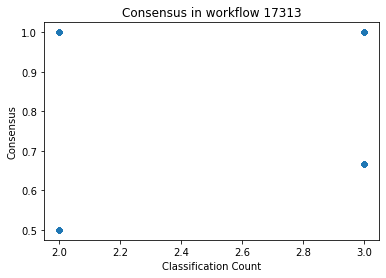

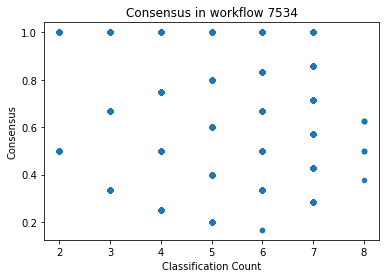

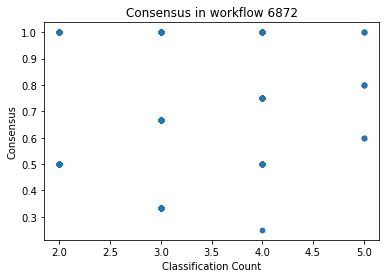

In [5]:
for workflow_id, consensus in workflow_consensus.items():
    consensus_df = pandas.DataFrame(consensus)
    consensus_df[consensus_df['Classification Count'] > 1].plot.scatter(
        title='Consensus in workflow {}'.format(workflow_id),
        x='Classification Count',
        y='Consensus',
    )

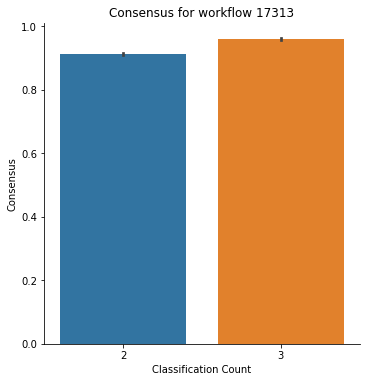

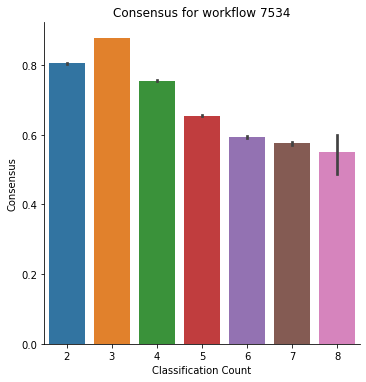

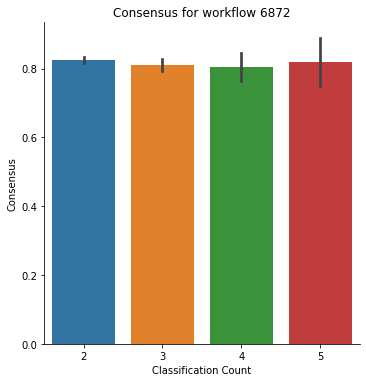

In [6]:
for workflow_id, consensus in workflow_consensus.items():
    consensus_df = pandas.DataFrame(consensus)
    seaborn.catplot(
        data=consensus_df[consensus_df['Classification Count'] > 1],
        x='Classification Count',
        y='Consensus',
        kind='bar',
    )
    matplotlib.pyplot.title("Consensus for workflow {}".format(workflow_id))
    matplotlib.pyplot.show()